#Coral Area Measurements
##First Look
###Sergio Daniel Hernandez Charpak
###Jose Francisco Molano

<p>Notebook creado para el análisis de las imágenes de corales tomadas por Nancy Ruiz para el grupo BIOMMAR bajo la dirección de Susana Simancas en Uniandes en el marco del proyecto del curso Imágenes y Visión dictado por Marcela Hernández en el semestre 2016-10</p>

<p> Nuestra meta es usar esta librería http://scikit-image.org/docs/stable/api/api.html </p>

<p>Se pueden ver ejemplos en: http://scikit-image.org/docs/stable/auto_examples/index.html </p>

In [5]:
%pylab inline
import pylab
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
#from skimage.filters import threshold_otsu, threshold_adaptive
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.measure import label

In [7]:
inputfolder = '../Fotos_prueba/'

This is a test on one of the images. We will make use of the glob library to analyze all the images

In [8]:
input_image = 'rsz_img_6780.jpg'

In [9]:
image = pylab.imread(inputfolder+input_image)

In [10]:
print image.shape

(3888, 2592, 3)


<p>The image is an RGB image. We will transform it on a first basis to simplify the process.</p>
<p> We follow the example: http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_adapt_rgb.html#example-color-exposure-plot-adapt-rgb-py </p>

In [11]:
from skimage.color import rgb2gray
img = rgb2gray(image)

In [12]:
print img.shape

(3888, 2592)


In [13]:
print img

[[ 0.0110051   0.0110051   0.0110051  ...,  0.00474706  0.0025149
   0.0025149 ]
 [ 0.0110051   0.0110051   0.0110051  ...,  0.00474706  0.0025149
   0.0025149 ]
 [ 0.0110051   0.0110051   0.0110051  ...,  0.00474706  0.0025149
   0.0025149 ]
 ..., 
 [ 0.04957373  0.05349529  0.05349529 ...,  0.38487922  0.38095765
   0.38487922]
 [ 0.04173059  0.04565216  0.04957373 ...,  0.38095765  0.37703608
   0.38095765]
 [ 0.03780902  0.04173059  0.04957373 ...,  0.38880078  0.38880078
   0.40056549]]


In [14]:
img_mean = np.mean(img)
img_std = np.std(img)
img_max = np.max(img)
img_min = np.min(img)

In [15]:
threshold = img_min + 2.0 *img_std

In [16]:
mask = img < threshold
img_thresholded = np.zeros(img.shape)
img_thresholded[mask] = 255

In [19]:
etiquetas, num = label(img_thresholded, connectivity=1, return_num=True)

In [20]:
print etiquetas
print num

[[ 1  1  1 ...,  3  3  3]
 [ 1  1  1 ...,  3  3  3]
 [ 1  1  1 ...,  3  3  3]
 ..., 
 [50 50 50 ...,  0  0  0]
 [50 50 50 ...,  0  0  0]
 [50 50 50 ...,  0  0  0]]
116


In [31]:
print mask

[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]]


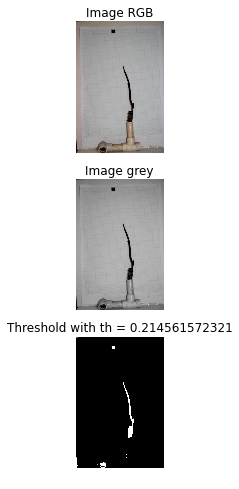

In [32]:
fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image RGB')

ax1.imshow(img)
ax1.set_title('Image grey')

ax2.imshow(img_thresholded)
ax2.set_title('Threshold with th = '+ str(threshold))

for ax in axes:
    ax.axis('off')

plt.show()

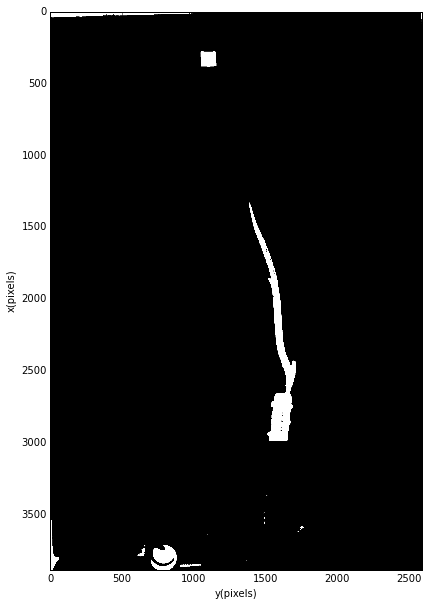

In [33]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_thresholded)
plt.savefig("img_man_umbr.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [34]:
plt.close(fig)

First try at thresholding copying the example: http://scikit-image.org/docs/stable/auto_examples/segmentation/plot_threshold_adaptive.html#example-segmentation-plot-threshold-adaptive-py

In [13]:
radius = 500
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu





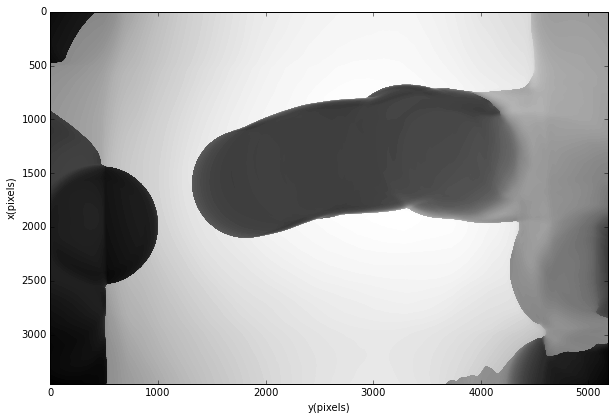

In [14]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(local_otsu)
plt.savefig("img_local_otsu.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [11]:
plt.close(fig)

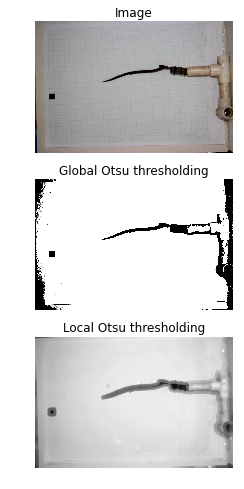

In [12]:

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image')

ax1.imshow(global_otsu)
ax1.set_title('Global Otsu thresholding')

ax2.imshow(local_otsu)
ax2.set_title('Local Otsu thresholding')

for ax in axes:
    ax.axis('off')

plt.show()


In [23]:
plt.close(fig)